In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import seaborn as sns
import pandas as pd

In [16]:
with open('pyro_bo_mrep_40_f_branin_rep_39.pkl', 'rb') as f:
    res_dict = pickle.load(f)


In [33]:
with open('pyro_bo_mrep_20_f_branin_q_size_5.pkl', 'rb') as f:
    res_dict = pickle.load(f)

In [34]:
len(res_dict['MC']['5'])
print(res_dict['MC'].keys())
n_samples = '5'

dict_keys(['5', '10', '20', '50'])


In [35]:
mc_y = np.array([res['y_min'] for res in res_dict['MC'][n_samples]])
rqmc_y = np.array([res['y_min'] for res in res_dict['RQMC'][n_samples]])

In [36]:
mc_x = np.array([res['X_exp'] for res in res_dict['MC'][n_samples]])
rqmc_x = np.array([res['X_min'] for res in res_dict['RQMC'][n_samples]])

mc_x_reshape = mc_x[:,:,:].reshape(-1,2)
rqmc_x_reshape = rqmc_x[:,:,:].reshape(-1,2)

IndexError: too many indices for array

In [37]:
mc_x.shape

(40,)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


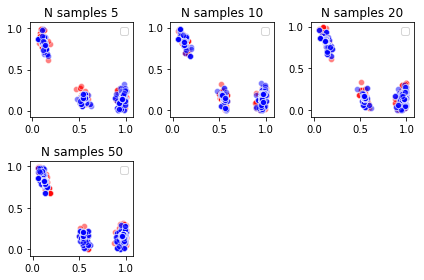

In [38]:
def plot_scatter(res_dict, type_sam='_min'):
    plt.figure()
    i = 1
    for n_samples in res_dict['MC']:
        mc_y = np.array([res['y'+type_sam] for res in res_dict['MC'][n_samples]])
        rqmc_y = np.array([res['y'+type_sam] for res in res_dict['RQMC'][n_samples]])
        mc_x = np.array([res['X'+type_sam] for res in res_dict['MC'][n_samples]])
        rqmc_x = np.array([res['X'+type_sam] for res in res_dict['RQMC'][n_samples]])
        mc_x_reshape = mc_x[:,:,:].reshape(-1,2)
        rqmc_x_reshape = rqmc_x[:,:,:].reshape(-1,2)
        plt.subplot(2,3,i)
        sns.scatterplot(mc_x_reshape[:,0], mc_x_reshape[:,1], color='red', alpha=0.5)
        sns.scatterplot(rqmc_x_reshape[:,0], rqmc_x_reshape[:,1], color='blue', alpha=0.5)
        #sns.scatterplot([0.5], [0.5], color='green', alpha=1)
        plt.legend()
        plt.title("N samples %s" % n_samples)
        i +=1
    plt.tight_layout()
    
plot_scatter(res_dict)

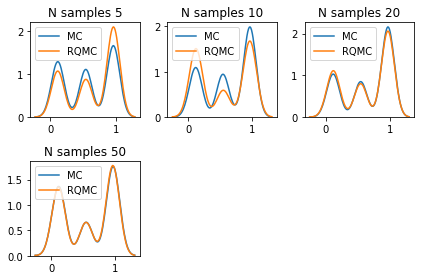

In [39]:
def plot_coordinate(res_dict, type_sam='_min'):
    plt.figure()
    i = 1
    for n_samples in res_dict['MC']:
        mc_y = np.array([res['y'+type_sam] for res in res_dict['MC'][n_samples]])
        rqmc_y = np.array([res['y'+type_sam] for res in res_dict['RQMC'][n_samples]])
        mc_x = np.array([res['X'+type_sam] for res in res_dict['MC'][n_samples]])
        rqmc_x = np.array([res['X'+type_sam] for res in res_dict['RQMC'][n_samples]])
        mc_x_reshape = mc_x[:,:,:].reshape(-1,2)
        rqmc_x_reshape = rqmc_x[:,:,:].reshape(-1,2)
        plt.subplot(2,3,i)
        sns.kdeplot(mc_x_reshape[:,0], label='MC')
        sns.kdeplot(rqmc_x_reshape[:,0], label='RQMC')
        plt.title("N samples %s" % n_samples)
        i +=1
    plt.tight_layout()
plot_coordinate(res_dict)



In [ ]:
#sns.kdeplot(mc_x_reshape[:,1], label='MC')
#sns.kdeplot(rqmc_x_reshape[:,1], label='RQMC')

In [ ]:
#df1 = pd.DataFrame(mc_x_reshape, columns=['x1', 'y1'])
#df2 = pd.DataFrame(rqmc_x_reshape, columns=['x2', 'y2'])


# plot
# ========================================   
#graph = sns.jointplot(x=df1.x1, y=df1.y1, color='r')

#graph.x = df2.x2
#graph.y = df2.y2
#graph.plot_joint(plt.scatter, marker='x', c='b', s=50)

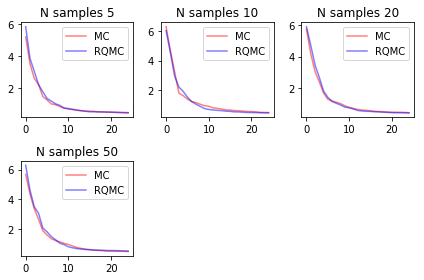

In [40]:

def plot_lines(res_dict, type_sam='_min'):
    plt.figure()
    i = 1
    for n_samples in res_dict['MC']:
        mc_y = np.array([res['y'+type_sam] for res in res_dict['MC'][n_samples]])
        rqmc_y = np.array([res['y'+type_sam] for res in res_dict['RQMC'][n_samples]])
        mc_x = np.array([res['X'+type_sam] for res in res_dict['MC'][n_samples]])
        rqmc_x = np.array([res['X'+type_sam] for res in res_dict['RQMC'][n_samples]])
        mc_x_reshape = mc_x[:,7:,:].reshape(-1,2)
        rqmc_x_reshape = rqmc_x[:,7:,:].reshape(-1,2)
        plt.subplot(2,3,i)
        plt.plot(mc_y[:,:].transpose().mean(axis=1),alpha=0.5, color="red", label='MC' ) #.min(axis=1)
        plt.plot(rqmc_y[:,:].transpose().mean(axis=1), alpha=0.5, color="blue", label='RQMC')
        plt.title("N samples %s" % n_samples)
        plt.legend()
        i +=1
        #if i == 3: break
    
    plt.tight_layout()
plot_lines(res_dict)

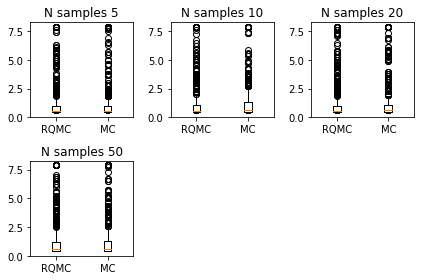

In [41]:

def plot_boxplot_all(res_dict, type_sam='_min'):
    plt.figure()
    i = 1
    for n_samples in res_dict['MC']:
        mc_y = np.array([res['y'+type_sam] for res in res_dict['MC'][n_samples]])
        rqmc_y = np.array([res['y'+type_sam] for res in res_dict['RQMC'][n_samples]])
        mc_x = np.array([res['X'+type_sam] for res in res_dict['MC'][n_samples]])
        rqmc_x = np.array([res['X'+type_sam] for res in res_dict['RQMC'][n_samples]])
        mc_x_reshape = mc_x[:,7:,:].reshape(-1,2)
        rqmc_x_reshape = rqmc_x[:,7:,:].reshape(-1,2)
        plt.subplot(2,3,i)
        plt.boxplot([rqmc_y[:,:].flatten(), mc_y[:,:].flatten()], labels=['RQMC', 'MC'])
        plt.title("N samples %s" % n_samples)
        i +=1
    plt.tight_layout()
plot_boxplot_all(res_dict)

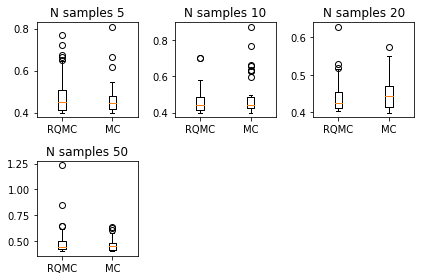

In [42]:
#print np.log(np.mean(rqmc_y[:,7:].min(axis=1)**2)), np.log(np.mean(mc_y[:,7:].min(axis=1)**2))


def plot_boxplot_min(res_dict, type_sam='_min'):
    plt.figure()
    i = 1
    for n_samples in res_dict['MC']:
        mc_y = np.array([res['y'+type_sam] for res in res_dict['MC'][n_samples]])
        rqmc_y = np.array([res['y'+type_sam] for res in res_dict['RQMC'][n_samples]])
        mc_x = np.array([res['X'+type_sam] for res in res_dict['MC'][n_samples]])
        rqmc_x = np.array([res['X'+type_sam] for res in res_dict['RQMC'][n_samples]])
        mc_x_reshape = mc_x[:,7:,:].reshape(-1,2)
        rqmc_x_reshape = rqmc_x[:,7:,:].reshape(-1,2)
        plt.subplot(2,3,i)
        plt.boxplot([rqmc_y[:,:].min(axis=1), mc_y[:,:].min(axis=1)], labels=['RQMC', 'MC'])
        plt.title("N samples %s" % n_samples)
        i +=1
    plt.tight_layout()
plot_boxplot_min(res_dict)

In [43]:
for sample_size in res_dict['MC'].keys():
    for method in ['MC', 'RQMC']:
        mean_method = np.array([res['y_min'][-1] for res in  res_dict[method][sample_size]]).mean()
        var_method = np.array([res['y_min'][-1] for res in  res_dict[method][sample_size]]).var()
        print (mean_method, var_method)


0.46584302 0.00632185
0.48311347 0.009145844
0.4878172 0.011586124
0.46310407 0.0050452068
0.45162803 0.0020264804
0.44263706 0.0020017975
0.46215886 0.003984927
0.4934469 0.02158737
